In [11]:
from graphviz import Digraph

def visualize_tree(tree):
    
    if tree is None: return "Nothing in Tree !"
        
    def add_nodes_edges(tree , dot = None):
        
        if dot is None:
            
            dot = Digraph()
            dot.attr('node' , shape = 'circle')
            dot.node(name = str(tree), label = str(tree.val))
            
        for child in [tree.left , tree.right]:
            if child is not None:
                
                if child == tree.left: dot.attr('node', shape = 'circle', style = 'filled', fillcolor = 'lightblue')
                if child == tree.right: dot.attr('node' , shape = 'doublecircle' , style = 'filled' , fillcolor = 'seashell')
                dot.node(name=str(child) , label = str(child.val))
                dot.edge(str(tree), str(child))
                dot = add_nodes_edges(child , dot=dot)
        return dot
    
    dot = add_nodes_edges(tree)
    
    display(dot)


class TreeNode:
    def __init__(self , val):
        self.val = val
        self.left = None
        self.right = None
    
    
class BST(TreeNode):
    def __init__(self , val , parent = None):
        super().__init__(val)
        self.parent = parent
            
            
def insert (self , val):
    
    if val < self.val:    #this will check whether the value is less than root or not
            
        if self.left is None:       #this will insert the value in the left node when value its empty
            
            new_node = BST(val , parent = self)
            self.left = new_node
                
        else:                         #this will call when the node is not empty
            self.left.insert(val)
            
    else:
        
        if self.right is None:
            
            new_node = BST(val , parent = self)
            self.right = new_node
            
        else:
            self.right.insert(val)
BST.insert = insert


def dfs_inorder(self):
    
    if self.left:
        self.left.dfs_inorder()
        
    print(self.val)
    
    if self.right:
        self.right.dfs_inorder()
        
BST.dfs_inorder = dfs_inorder

In [12]:
b = BST(20)

In [13]:
b.insert(24)
b.insert(10)
b.insert(1)


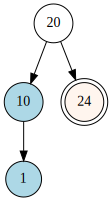

In [14]:
visualize_tree(b)

In [15]:
b.dfs_inorder()

1
10
20
24


In [16]:
def find_root(self):
    
    temp = self
    while temp.parent is not None:
        
        temp = temp.parent
    
    return temp
        
BST.find_root = find_root

In [17]:
def find_min(self):
    
    min_node = self
    
    if self.left is not None:
        min_node = find_min(self.left)
        
    return min_node

BST.find_min = find_min

In [18]:
def set_for_parent(self , new_ref):
    
    if self.parent is None:
        return
    
    if self.parent.right == self:
        self.parent.right == new_ref
        
    if self.parent.left == self:
        self.parent,left = new_ref
        
BST.set_for_parent = set_for_parent

In [19]:
def replace_with_node(self , node):
    
    self.set_for_parent(node)
    node.parent = self.parent
    self.parent = None
    return node.find_root()
  
        
BST.replace_with_node = replace_with_node

In [22]:
def delete(self , val):
    
    if self.parent is None and self.right is None and self.left is None and self.val == val:
        return None
    
    if self.val == val:
        
        if self.right is None and self.left is None:
            self.set_for_parent(None)
            return self.find_root()
        
        if self.right is None:
            return self.replace_with_node(self.left)
        
        if self.left is None:
            return self.replace_with_node(self.right)
        
        
        successor = self.right.find_min()
        
        
        self.val = successor.val
        
        return self.right.delete(successor.val)
    
    if val < self.val:
        
        if self.left is None:
            return self.left.delete(val)
        else:
            return self.find_root()
        
    else:
        if self.right is not None:
            return self.right.delete(val)
        else:
            return self.find_root()
BST.delete = delete

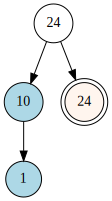

In [25]:
b = b.delete(20)
visualize_tree(b)